In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
phone=pd.read_csv("C:/Users/Rajesh/Documents/me/data_assignments/mod15/myphonedata.csv")
phone.head()

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1


In [2]:
phone=phone.drop(['V1','V2','V3'],axis=1) #dropping data which has char
phone

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
5,0,1,0,0,0,1
6,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
9,1,1,0,0,0,1


In [3]:
frequent_itemsets=apriori(phone,min_support=0.001,max_len=2,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.090909,(yellow)
4,0.181818,(orange)
5,0.545455,(blue)
6,0.363636,"(red, white)"
7,0.090909,"(red, green)"
8,0.090909,"(orange, red)"
9,0.363636,"(red, blue)"


In [4]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
frequent_itemsets

,support,itemsets
1,0.636364,(white)
0,0.545455,(red)
5,0.545455,(blue)
6,0.363636,"(red, white)"
9,0.363636,"(red, blue)"
12,0.363636,"(white, blue)"
2,0.181818,(green)
4,0.181818,(orange)
11,0.181818,"(orange, white)"
3,0.090909,(yellow)


In [5]:
import matplotlib.pyplot as plt
plt.bar(x=list(range(1,11)),height=frequent_itemsets.support[1:11],color='rgmyk');plt.xlabel("items");plt.ylabel("support");
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
arules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
arules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606


In [8]:
arules.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606


In [9]:
#remove redundancy rules
def to_list(i):
    return(sorted(list(i)))
maxm=arules.antecedents.apply(to_list)+arules.consequents.apply(to_list)
maxm

0       [red, white]
1       [white, red]
2        [red, blue]
3        [blue, red]
4      [white, blue]
5      [blue, white]
6    [orange, white]
7    [white, orange]
dtype: object

In [10]:
maxm=maxm.apply(sorted)
maxm

0       [red, white]
1       [red, white]
2        [blue, red]
3        [blue, red]
4      [blue, white]
5      [blue, white]
6    [orange, white]
7    [orange, white]
dtype: object

In [11]:
rules_set=list(maxm)
rules_set

[['red', 'white'],
 ['red', 'white'],
 ['blue', 'red'],
 ['blue', 'red'],
 ['blue', 'white'],
 ['blue', 'white'],
 ['orange', 'white'],
 ['orange', 'white']]

In [12]:
unique_ruleset=[list(i) for i in set(tuple(j) for j in rules_set)]
unique_ruleset

[['orange', 'white'], ['blue', 'white'], ['blue', 'red'], ['red', 'white']]

In [13]:
index=[]
for i in unique_ruleset:
    index.append(rules_set.index(i))
index

[6, 4, 2, 0]

In [14]:
final_rules=arules.iloc[index,:]
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909


In [15]:
final_rules=final_rules.sort_values('lift',ascending=False).head()
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909


In [16]:
#apriori agorithm for different values
frequent_itemsets=apriori(phone,min_support=0.008,max_len=3,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.090909,(yellow)
4,0.181818,(orange)
5,0.545455,(blue)
6,0.363636,"(red, white)"
7,0.090909,"(red, green)"
8,0.090909,"(orange, red)"
9,0.363636,"(red, blue)"


In [17]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
frequent_itemsets

,support,itemsets
1,0.636364,(white)
0,0.545455,(red)
5,0.545455,(blue)
6,0.363636,"(red, white)"
9,0.363636,"(red, blue)"
12,0.363636,"(white, blue)"
2,0.181818,(green)
4,0.181818,(orange)
11,0.181818,"(orange, white)"
15,0.181818,"(red, white, blue)"


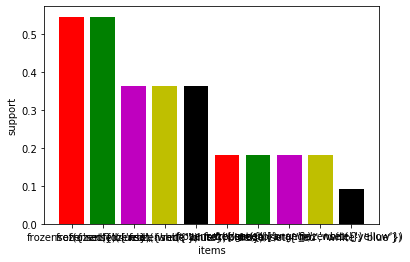

In [18]:
import matplotlib.pyplot as plt
plt.bar(x=list(range(1,11)),height=frequent_itemsets.support[1:11],color='rgmyk');plt.xlabel("items");plt.ylabel("support");
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.show()

In [19]:
arules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
arules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
5,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
7,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
8,"(red, green)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
9,"(red, white)",(green),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909


In [20]:
arules.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(red),"(white, green)",0.545455,0.090909,0.090909,0.166667,1.833333,0.041322,1.090909
10,"(white, green)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
17,(white),"(orange, red)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
13,(white),"(red, green)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
7,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
